### Pre-installs

In [1]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install sklearn
# %pip install -U scikit-learn
# %pip install spotipy

### Input your data here

In [2]:
input = "22"

### Cleaning Song Dataset

In [3]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("data/tracks.csv")

# Creating the dataframe
df = pd.DataFrame(dataset)

df.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


In [4]:
# Spotify API Authentication Information
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_id = # CLIENT ID GOES HERE
client_secret = # CLIENT SECRET GOES HERE
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
# Creating a new feature that comprises of Song Name and Artist.
df["song_name_artist"] = df["name"] + df["artists"]

In [6]:
df['year'] = df['release_date'].str.extract(r'(\d{4})').astype(int)

In [7]:
# Removing all duplicate songs-artist pairs. Meaning that there won't be 2 of the same song sung by the same artist.
print(df.shape)
df.drop_duplicates(subset=["song_name_artist"], keep='first', inplace=True)
print(df.shape)

(586672, 22)
(526610, 22)


In [8]:
# Filter data to keep songs published 2000* and later.
df = df[df["year"] >= 2000]
print(df.shape)

(187472, 22)


In [9]:
df_fill_null = df.copy()

df_fill_null['name'] = df.apply(
    lambda row: sp.track(f"spotify:track:{row['id']}")['name'] if pd.isnull(row['name']) else row['name'], axis=1
)

In [10]:
# Removing rows without song name.
df_removed = df_fill_null.dropna()
df_removed.isnull().sum()
df_removed.count()
# df_removed.head()

id                  187472
name                187472
popularity          187472
duration_ms         187472
explicit            187472
artists             187472
id_artists          187472
release_date        187472
danceability        187472
energy              187472
key                 187472
loudness            187472
mode                187472
speechiness         187472
acousticness        187472
instrumentalness    187472
liveness            187472
valence             187472
tempo               187472
time_signature      187472
song_name_artist    187472
year                187472
dtype: int64

### Adding genres into dataset

In [11]:
artist_dataset = pd.read_csv("data/artists.csv")

artist_dataset['first_id_artists'] = artist_dataset['id']
needed = artist_dataset[["first_id_artists", "genres"]]

needed.head()

,first_id_artists,genres
0,0DheY5irMjBUeLybbCUEZ2,[]
1,0DlhY15l3wsrnlfGio2bjU,[]
2,0DmRESX2JknGPQyO15yxg7,[]
3,0DmhnbHjm1qw6NCYPeZNgJ,[]
4,0Dn11fWM7vHQ3rinvWEl4E,[]


In [12]:
import ast

df_removed['artists'] = df_removed['artists'].apply(ast.literal_eval)
df_removed.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,song_name_artist,year
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,[Gerry & The Pacemakers],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,...,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,You'll Never Walk Alone - Mono; 2002 Remaster[...,2008
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,[The Toys],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,A Lover's Concerto['The Toys'],2020
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,[Gerry & The Pacemakers],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,...,0,0.0289,0.255,0.000005,0.163,0.588,104.536,4,Ferry Cross the Mersey - Mono; 2002 Remaster['...,2008
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,[Gerry & The Pacemakers],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,...,1,0.0300,0.406,0.000000,0.122,0.478,106.773,4,Don't Let the Sun Catch You Crying (Main) - Mo...,2008
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,[Frank Sinatra],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,...,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,The September Of My Years - Live At The Sands ...,2018


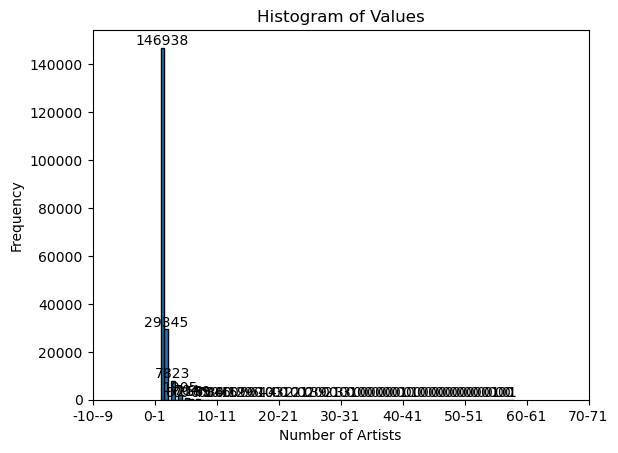

In [13]:
import matplotlib.pyplot as plt

def count_items_in_list(lst):
    return len(lst)

# Apply the function to the DataFrame column
df_removed['artists_count'] = df_removed['artists'].apply(count_items_in_list)
ax = df_removed['artists_count'].plot(kind='hist', bins=100, edgecolor='black')

bin_labels = [f'{int(b)}-{int(b)+1}' for b in ax.get_xticks()]
plt.xticks(ax.get_xticks(), bin_labels)

# Add number labels on the bars
for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1,
             str(int(i.get_height())), ha='center', va='bottom')

plt.title('Histogram of Values')
plt.xlabel('Number of Artists')
plt.ylabel('Frequency')
plt.show()

In [14]:
df_removed['artists_count'].describe()

# Giving a generous estimate of 3 Std away from mean as outlier:
mean = df_removed['artists_count'].mean()
std = df_removed['artists_count'].std()

upper = mean + (3 * std)
lower = mean - (3 * std)
print(upper.round())
print(lower.round())

4.0
-1.0


187472


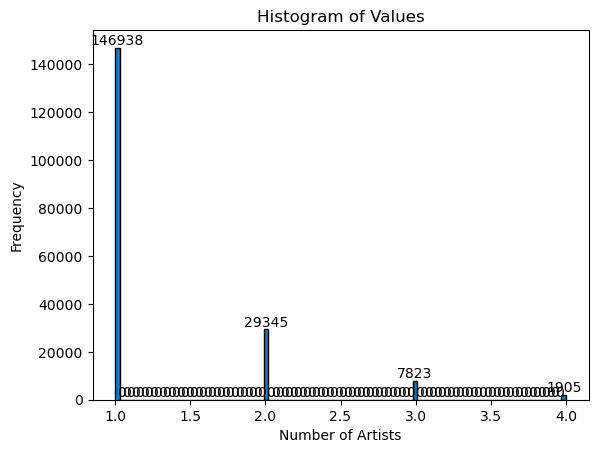

186011


In [15]:
print(df_removed['id'].count())
df_removed = df_removed[(df_removed['artists_count'] >= -1) & (df_removed['artists_count'] <= 4)]

ax = df_removed['artists_count'].plot(kind='hist', bins=100, edgecolor='black')

# Add number labels on the bars
for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1,
             str(int(i.get_height())), ha='center', va='bottom')

plt.title('Histogram of Values')
plt.xlabel('Number of Artists')
plt.ylabel('Frequency')
plt.show()
print(df_removed['id'].count())

In [16]:
expanded_artists = df_removed['artists'].apply(lambda x: pd.Series(x))

# Rename the columns
expanded_artists.columns = [f"artist_{i+1}" for i in range(len(expanded_artists.columns))]

# Concatenate the expanded columns with the original DataFrame
df_merged = pd.concat([df_removed, expanded_artists], axis=1)
df_merged.head()


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,valence,tempo,time_signature,song_name_artist,year,artists_count,artist_1,artist_2,artist_3,artist_4
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,[Gerry & The Pacemakers],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,...,0.285,113.564,3,You'll Never Walk Alone - Mono; 2002 Remaster[...,2008,1,Gerry & The Pacemakers,NaN,NaN,NaN
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,[The Toys],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,0.839,120.689,4,A Lover's Concerto['The Toys'],2020,1,The Toys,NaN,NaN,NaN
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,[Gerry & The Pacemakers],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,...,0.588,104.536,4,Ferry Cross the Mersey - Mono; 2002 Remaster['...,2008,1,Gerry & The Pacemakers,NaN,NaN,NaN
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,[Gerry & The Pacemakers],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,...,0.478,106.773,4,Don't Let the Sun Catch You Crying (Main) - Mo...,2008,1,Gerry & The Pacemakers,NaN,NaN,NaN
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,[Frank Sinatra],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,...,0.239,117.153,3,The September Of My Years - Live At The Sands ...,2018,1,Frank Sinatra,NaN,NaN,NaN


In [17]:
artist_dataset['artists'] = artist_dataset['name']
artist_genres = artist_dataset[["artists", "genres"]]

df_merged = df_merged.drop('artists', axis=1)
df_merged['artist_1'] = df_merged['artist_1'].fillna('')
df_merged['artist_2'] = df_merged['artist_2'].fillna('')
df_merged['artist_3'] = df_merged['artist_3'].fillna('')
df_merged['artist_4'] = df_merged['artist_4'].fillna('')
df_merged.head()

,id,name,popularity,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,valence,tempo,time_signature,song_name_artist,year,artists_count,artist_1,artist_2,artist_3,artist_4
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,0,...,0.285,113.564,3,You'll Never Walk Alone - Mono; 2002 Remaster[...,2008,1,Gerry & The Pacemakers,,,
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,2,...,0.839,120.689,4,A Lover's Concerto['The Toys'],2020,1,The Toys,,,
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,6,...,0.588,104.536,4,Ferry Cross the Mersey - Mono; 2002 Remaster['...,2008,1,Gerry & The Pacemakers,,,
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,1,...,0.478,106.773,4,Don't Let the Sun Catch You Crying (Main) - Mo...,2008,1,Gerry & The Pacemakers,,,
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,7,...,0.239,117.153,3,The September Of My Years - Live At The Sands ...,2018,1,Frank Sinatra,,,


In [18]:
def string_to_list(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return []

for i in range(1, 5):  # Iterate over artist_1, artist_2, and artist_3
    # Merge genres for each artist column
    df_merged = pd.merge(df_merged, artist_genres, left_on=f'artist_{i}', right_on='artists', how='left')
    # Rename the genres column
    df_merged.rename(columns={'genres': f'genres_{i}'}, inplace=True)
    # Drop the redundant 'artists' column
    df_merged.drop('artists', axis=1, inplace=True)
    
df_merged.head()

,id,name,popularity,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,year,artists_count,artist_1,artist_2,artist_3,artist_4,genres_1,genres_2,genres_3,genres_4
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,0,...,2008,1,Gerry & The Pacemakers,,,,"['adult standards', 'brill building pop', 'bri...",NaN,NaN,NaN
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,2,...,2020,1,The Toys,,,,[],NaN,NaN,NaN
2,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,2,...,2020,1,The Toys,,,,['thai pop'],NaN,NaN,NaN
3,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,6,...,2008,1,Gerry & The Pacemakers,,,,"['adult standards', 'brill building pop', 'bri...",NaN,NaN,NaN
4,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,1,...,2008,1,Gerry & The Pacemakers,,,,"['adult standards', 'brill building pop', 'bri...",NaN,NaN,NaN


In [19]:
df_merged['genres_1'] = df_merged['genres_1'].fillna('[]')
df_merged['genres_2'] = df_merged['genres_2'].fillna('[]')
df_merged['genres_3'] = df_merged['genres_3'].fillna('[]')
df_merged['genres_4'] = df_merged['genres_4'].fillna('[]')

df_merged['genres_1'] = df_merged['genres_1'].apply(ast.literal_eval)
df_merged['genres_2'] = df_merged['genres_2'].apply(ast.literal_eval)
df_merged['genres_3'] = df_merged['genres_3'].apply(ast.literal_eval)
df_merged['genres_4'] = df_merged['genres_4'].apply(ast.literal_eval)
df_merged.head()

,id,name,popularity,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,year,artists_count,artist_1,artist_2,artist_3,artist_4,genres_1,genres_2,genres_3,genres_4
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,0,...,2008,1,Gerry & The Pacemakers,,,,"[adult standards, brill building pop, british ...",[],[],[]
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,2,...,2020,1,The Toys,,,,[],[],[],[]
2,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,2,...,2020,1,The Toys,,,,[thai pop],[],[],[]
3,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,6,...,2008,1,Gerry & The Pacemakers,,,,"[adult standards, brill building pop, british ...",[],[],[]
4,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,1,...,2008,1,Gerry & The Pacemakers,,,,"[adult standards, brill building pop, british ...",[],[],[]


In [20]:
df_merged['genres'] = df_merged['genres_1'] + df_merged['genres_2'] + df_merged['genres_3'] + df_merged['genres_4']

# Apply the function to each row to create a new column containing concatenated lists
df_merged.drop(['genres_1', 'genres_2', 'genres_3', 'genres_4'], axis=1, inplace=True)

In [21]:
df_merged['genres'] = df_merged['genres'].apply(lambda x: list(set(x)))
df_merged.iloc[4789]['genres']

['pop dance',
 'trance',
 'progressive trance',
 'progressive house',
 'edm',
 'uplifting trance']

In [22]:
df_merged.iloc[9000:9005].head()

,id,name,popularity,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,tempo,time_signature,song_name_artist,year,artists_count,artist_1,artist_2,artist_3,artist_4,genres
9000,4HY0rxaYNx2e7OS4dF7Gl0,Choppin' 'n' Changin' - 2008 Remaster,4,149480,0,"['2nvKpWcP8etYTq4JrRiUiy', '03hfAxVdAWj7kxDnSG...",2010-04-12,0.335,0.868,9,...,174.739,4,Choppin' 'n' Changin' - 2008 Remaster['Cliff R...,2010,2,Cliff Richard,The Shadows,,,"[british invasion, merseybeat, europop, mellow..."
9001,4HY0rxaYNx2e7OS4dF7Gl0,Choppin' 'n' Changin' - 2008 Remaster,4,149480,0,"['2nvKpWcP8etYTq4JrRiUiy', '03hfAxVdAWj7kxDnSG...",2010-04-12,0.335,0.868,9,...,174.739,4,Choppin' 'n' Changin' - 2008 Remaster['Cliff R...,2010,2,Cliff Richard,The Shadows,,,"[british invasion, merseybeat, rock-and-roll, ..."
9002,4HY0rxaYNx2e7OS4dF7Gl0,Choppin' 'n' Changin' - 2008 Remaster,4,149480,0,"['2nvKpWcP8etYTq4JrRiUiy', '03hfAxVdAWj7kxDnSG...",2010-04-12,0.335,0.868,9,...,174.739,4,Choppin' 'n' Changin' - 2008 Remaster['Cliff R...,2010,2,Cliff Richard,The Shadows,,,"[british invasion, merseybeat, rock-and-roll, ..."
9003,1fFcUhuTyKulwqikvRG2hJ,Terserah,60,244831,0,['4rUYk0fV0Z4pOtwVbEAyK9'],2008-08-04,0.540,0.387,7,...,119.886,4,Terserah['Glenn Fredly'],2008,1,Glenn Fredly,,,,[]
9004,1fFcUhuTyKulwqikvRG2hJ,Terserah,60,244831,0,['4rUYk0fV0Z4pOtwVbEAyK9'],2008-08-04,0.540,0.387,7,...,119.886,4,Terserah['Glenn Fredly'],2008,1,Glenn Fredly,,,,"[indonesian pop, indonesian jazz]"


In [43]:
# Exporting dataset to new .csv file.
df_merged.to_csv('data/tracks_with_genres.csv', index=False)

### Processing the Input Song

In [23]:
# Using Spotify API to search for a song's information based on input and adding the necessary information in a DataFrame.
def search_track(track_name):
    # Search for the track
    results = sp.search(q=track_name, type='track')

    # Check if the track exists
    if results['tracks']['total'] > 0:
        # Get the first track from the results
        track = results['tracks']['items'][0]
        explicit = int(track["explicit"] == True)
        print(f'Found track: {track["name"]} by {track["artists"][0]["name"]} from the album {track["album"]["name"]}.')
        track_dict = {"id": track["id"], "name": track["name"], "popularity": track["popularity"], 
                      "duration_ms": track["duration_ms"], "explicit": explicit, "artists": track["artists"][0]["name"],
                      "id_artists": track["artists"][0]["id"], "release_date": track["album"]["release_date"]}
        return track_dict
    else:
        print('Track not found')
        return None

# Creating a Single Row DataFrame for the input song.
track_result = search_track(input)
td = pd.DataFrame(track_result, index=[0])
td

Found track: 22 (Taylor's Version) by Taylor Swift from the album Red (Taylor's Version).


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date
0,3yII7UwgLF6K5zW3xad3MP,22 (Taylor's Version),79,230960,0,Taylor Swift,06HL4z0CvFAxyc27GXpf02,2021-11-12


In [24]:
# Obtaining Feature Data from song based on its song_id from previous function and adding them to a DataFrame.
def get_audio_features(track_result):
    song_id = track_result["id"]
    results = sp.audio_features(song_id)

    if results:
        return results[0]
    else:
        print(f'No audio features found for song ID: {song_id}')
        return None

audio_features = get_audio_features(track_result)
af = pd.DataFrame(audio_features, index=[0])
# Taking out the irrevelant features.
af_formatted = af.drop(["type", "id", "uri", "track_href", "analysis_url", "duration_ms"], axis=1)
# Merging both DataFrames to sync up with the dataset's layout.
td = pd.concat([td, af_formatted], axis=1)
td['year'] = td['release_date'].str.extract(r'(\d{4})').astype(int)

In [25]:
td

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,3yII7UwgLF6K5zW3xad3MP,22 (Taylor's Version),79,230960,0,Taylor Swift,06HL4z0CvFAxyc27GXpf02,2021-11-12,0.642,0.695,...,-5.62,1,0.0281,0.000443,0.00001,0.0753,0.642,103.984,4,2021


In [26]:
td['artists'] = "['" + td['artists'] + "']"
td['artists'] = td['artists'].apply(ast.literal_eval)

td

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,3yII7UwgLF6K5zW3xad3MP,22 (Taylor's Version),79,230960,0,[Taylor Swift],06HL4z0CvFAxyc27GXpf02,2021-11-12,0.642,0.695,...,-5.62,1,0.0281,0.000443,0.00001,0.0753,0.642,103.984,4,2021


In [27]:
td['artists_count'] = len(td['artists'])
td

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,artists_count
0,3yII7UwgLF6K5zW3xad3MP,22 (Taylor's Version),79,230960,0,[Taylor Swift],06HL4z0CvFAxyc27GXpf02,2021-11-12,0.642,0.695,...,1,0.0281,0.000443,0.00001,0.0753,0.642,103.984,4,2021,1


In [28]:
expanded_artists = td['artists'].apply(lambda x: pd.Series(x))

# Rename the columns
expanded_artists.columns = [f"artist_{i+1}" for i in range(len(expanded_artists.columns))]

# Concatenate the expanded columns with the original DataFrame
td = pd.concat([td, expanded_artists], axis=1)
td.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,artists_count,artist_1
0,3yII7UwgLF6K5zW3xad3MP,22 (Taylor's Version),79,230960,0,[Taylor Swift],06HL4z0CvFAxyc27GXpf02,2021-11-12,0.642,0.695,...,0.0281,0.000443,0.00001,0.0753,0.642,103.984,4,2021,1,Taylor Swift


In [29]:
def get_artist_genres(artist_name):
    try:
        results = sp.search(q='artist:' + artist_name, type='artist')
        genres = results['artists']['items'][0]['genres']
        return genres if genres else []
    except IndexError:
        return []
    
for i in range(len(td['artists_count'])):
    td['genres'] = td['artist_' + str(i+1)].apply(get_artist_genres)

td

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,artists_count,artist_1,genres
0,3yII7UwgLF6K5zW3xad3MP,22 (Taylor's Version),79,230960,0,[Taylor Swift],06HL4z0CvFAxyc27GXpf02,2021-11-12,0.642,0.695,...,0.000443,0.00001,0.0753,0.642,103.984,4,2021,1,Taylor Swift,[pop]


### Adding Input to Dataset and further processing

In [44]:
# Using the newly generated dataset .csv
df_generated = pd.read_csv("data/tracks_with_genres.csv")

In [30]:
# Adding the Input Song to the Dataset DataFrame. Added to the very front.
new_df = pd.concat([td, df_generated], ignore_index=True)
new_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,tempo,time_signature,year,artists_count,artist_1,genres,song_name_artist,artist_2,artist_3,artist_4
0,3yII7UwgLF6K5zW3xad3MP,22 (Taylor's Version),79,230960,0,[Taylor Swift],06HL4z0CvFAxyc27GXpf02,2021-11-12,0.642,0.695,...,103.984,4,2021,1,Taylor Swift,[pop],NaN,NaN,NaN,NaN
1,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,NaN,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,...,113.564,3,2008,1,Gerry & The Pacemakers,"[folk rock, british invasion, merseybeat, rock...",You'll Never Walk Alone - Mono; 2002 Remaster[...,,,
2,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,NaN,['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,120.689,4,2020,1,The Toys,[],A Lover's Concerto['The Toys'],,,
3,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,NaN,['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,120.689,4,2020,1,The Toys,[thai pop],A Lover's Concerto['The Toys'],,,
4,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,NaN,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,...,104.536,4,2008,1,Gerry & The Pacemakers,"[folk rock, british invasion, merseybeat, rock...",Ferry Cross the Mersey - Mono; 2002 Remaster['...,,,


In [31]:
genres_dummies = pd.get_dummies(new_df['genres'].apply(pd.Series).stack()).groupby(level=0).sum()

# Concatenate the binary columns with the original DataFrame
df_2 = pd.concat([new_df, genres_dummies], axis=1)

In [32]:
df_2 = df_2.drop(['id_artists', 'release_date', 'popularity', 'mode', 'artists_count', 'song_name_artist', 'artist_1', 'artist_2', 'artist_3', 'artist_4', 'genres'], axis=1)
df_2.head()

,id,name,duration_ms,explicit,artists,danceability,energy,key,loudness,speechiness,...,zikir,zillertal,zim hip hop,zim urban groove,zimdancehall,zolo,zouglou,zouk,zouk riddim,zurich indie
0,3yII7UwgLF6K5zW3xad3MP,22 (Taylor's Version),230960,0,[Taylor Swift],0.642,0.695,7,-5.620,0.0281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,160187,0,NaN,0.484,0.265,0,-11.101,0.0322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,159560,0,NaN,0.671,0.867,2,-2.706,0.0571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,159560,0,NaN,0.671,0.867,2,-2.706,0.0571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,141987,0,NaN,0.405,0.365,6,-10.226,0.0289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_2 = df_2.fillna(0)
df_2.head()

,id,name,duration_ms,explicit,artists,danceability,energy,key,loudness,speechiness,...,zikir,zillertal,zim hip hop,zim urban groove,zimdancehall,zolo,zouglou,zouk,zouk riddim,zurich indie
0,3yII7UwgLF6K5zW3xad3MP,22 (Taylor's Version),230960,0,[Taylor Swift],0.642,0.695,7,-5.620,0.0281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,160187,0,0,0.484,0.265,0,-11.101,0.0322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,159560,0,0,0.671,0.867,2,-2.706,0.0571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,159560,0,0,0.671,0.867,2,-2.706,0.0571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,141987,0,0,0.405,0.365,6,-10.226,0.0289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_2['song_id_name'] = df_2['id'] + df_2['name']
print(df_2.shape)
df_2.drop_duplicates(subset=["song_id_name"], keep='first', inplace=True)
print(df_2.shape)

(228030, 4383)
(186012, 4383)


### Cosine Similarity & Output Extraction

In [35]:
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Feature selection, removing non-useful rows.
def processing(df_2):
    # Normalize numerical features
    numerical_features = ['duration_ms', 'loudness', 'tempo']
    scaler = MinMaxScaler()
    df_2[numerical_features] = scaler.fit_transform(df_2[numerical_features])
    
    # Standardise Year
    df_2['standardized_year'] = scaler.fit_transform(df_2[['year']])
    df_2 = df_2.drop(['year'], axis=1)

    # Create a feature matrix
    feature_matrix = df_2.drop(['id', 'name', 'artists', 'song_id_name'], axis=1)
    # This is the input song. We are isolating it from the dataframe first.
    input = feature_matrix.iloc[0].T
    # This is the rest of the songs.
    feature_matrix = feature_matrix.iloc[1:]

    # Apply cosine similarity
    start = 0
    end = 1000
    arr = []
    
    # Returns comparison value of first song in dataset to all others in an array.
    # DataFrame can be customised before Feature Selection to change which song the subject of comparison should be.
    while end < feature_matrix['explicit'].count():
        # Compile the nth 1,000 songs in the dataframe.
        set = feature_matrix.iloc[start:end].T
        # Add the input song to the top of the dataframe.
        compare_df = pd.concat([input, set], axis=1).T
        # Perform cosine similarity.
        cosine_sim = cosine_similarity(compare_df) # Comparing bit by bit to prevent too many dimensions.
        cs_list = cosine_sim[0].tolist() # Taking only the first row a.k.a the comparison between the first song and all others.
        arr += cs_list
        # Prepare for the next 1,000 songs.
        start = end
        end += 1000
    return arr
arr = processing(df_2)
arr

[1.0000000000000002,
 0.37950327345099794,
 0.8209178139617235,
 0.9130143972446505,
 0.573287844559934,
 0.9478990308770825,
 0.9481179893639599,
 0.9418272142225342,
 0.9127899500599984,
 0.5690278743891729,
 0.9112913502119616,
 0.9282392724100799,
 0.924957650302123,
 0.6880806239393712,
 0.8815384929758425,
 0.48016899700008214,
 0.9288570890148361,
 0.589109384350121,
 0.9199965980392562,
 0.9252928842887582,
 0.9197680767104183,
 0.9465650109762492,
 0.8485269275158721,
 0.9418884255390639,
 0.9285567634155543,
 0.9299866929557989,
 0.938687432992503,
 0.9283469668805651,
 0.7101043303263246,
 0.8488794172615718,
 0.8617193245623005,
 0.8234943612891535,
 0.9539441724970661,
 0.7641897150664145,
 0.6947631718220334,
 0.934089950490503,
 0.9411349591382585,
 0.9208815016782714,
 0.9262264621500083,
 0.4228933395511466,
 0.9262121163031842,
 0.8473769258001785,
 0.928272103839002,
 0.913456709942029,
 0.9238231435383806,
 0.7499069822975515,
 0.9280496473258072,
 0.575274631232013

In [36]:
max(arr[1:])

1.0000000000000002

In [37]:
def compile_suggestions(arr):
    suggestions = []
    
    # Compiling all song ids that are above the pre-determined threshold for 'like the first song'.
    for i in range(len(arr)):
        if arr[i] > 0.9:
            suggestions.append(i)
    
    print(suggestions)
    return suggestions
suggestions = compile_suggestions(arr)

[0, 3, 5, 6, 7, 8, 10, 11, 12, 16, 18, 19, 20, 21, 23, 24, 25, 26, 27, 32, 35, 36, 37, 38, 40, 42, 43, 44, 46, 48, 51, 54, 57, 59, 65, 69, 70, 73, 75, 76, 78, 80, 83, 84, 85, 86, 88, 89, 90, 92, 93, 94, 96, 99, 101, 106, 107, 108, 110, 111, 112, 115, 117, 118, 121, 122, 123, 124, 125, 128, 130, 131, 135, 136, 137, 138, 139, 141, 145, 147, 149, 150, 151, 155, 157, 158, 160, 161, 163, 164, 165, 166, 168, 170, 171, 172, 173, 174, 177, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 215, 217, 219, 220, 221, 222, 223, 225, 226, 228, 231, 232, 233, 234, 236, 237, 239, 241, 242, 243, 244, 245, 246, 247, 253, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 275, 276, 277, 279, 283, 284, 285, 292, 296, 299, 301, 303, 304, 307, 310, 312, 315, 316, 317, 319, 320, 322, 325, 326, 327, 328, 330, 332, 334, 335, 336, 337, 338, 339, 341, 343, 346, 347, 348, 349, 351, 352, 353, 358, 359, 360, 361,

In [38]:
len(suggestions)

117905

In [39]:
# Extracting out the end result information.
df_main = df_2[df_2.index.isin(suggestions)]

df_main.head()

,id,name,duration_ms,explicit,artists,danceability,energy,key,loudness,speechiness,...,zim hip hop,zim urban groove,zimdancehall,zolo,zouglou,zouk,zouk riddim,zurich indie,song_id_name,standardized_year
0,3yII7UwgLF6K5zW3xad3MP,22 (Taylor's Version),0.041867,0,[Taylor Swift],0.642,0.695,7,0.865180,0.0281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3yII7UwgLF6K5zW3xad3MP22 (Taylor's Version),1.000000
5,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,0.028185,0,0,0.477,0.352,1,0.729230,0.0300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0ZMMtH875IR2TfkyC4PolDDon't Let the Sun Catch ...,0.380952
6,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,0.033786,0,0,0.319,0.201,7,0.671461,0.0623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1hx7X9cMXHWJjknb9O6AvaThe September Of My Year...,0.857143
7,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,0.042949,0,0,0.269,0.129,7,0.665542,0.0576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19oquvXf3bc65GSqtPYA5SIt Was A Very Good Year ...,0.857143
8,7LfvdUcwrrMKVh8WPGXnbA,How Do You Do It? - Mono,0.020385,0,0,0.617,0.711,9,0.852245,0.0297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7LfvdUcwrrMKVh8WPGXnbAHow Do You Do It? - Mono,0.380952


In [40]:
df_main.count() # There is one less for the last 3 features as the input song did not go through the extracted year's steps.
# df_final['standardized_year'].describe()

id                   96019
name                 96019
duration_ms          96019
explicit             96019
artists              96019
                     ...  
zouk                 96019
zouk riddim          96019
zurich indie         96019
song_id_name         96019
standardized_year    96019
Length: 4384, dtype: int64

In [41]:
df_main = df_main.iloc[1:]

df_main = df_main.drop('artists', axis=1)

id_artist_mapping = df.set_index('id')['artists'].to_dict()

# Add 'artist' column to df1 using the mapping
df_main['artists'] = df_main['id'].map(id_artist_mapping)
df_main.head()

,id,name,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,...,zim urban groove,zimdancehall,zolo,zouglou,zouk,zouk riddim,zurich indie,song_id_name,standardized_year,artists
5,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,0.028185,0,0.477,0.352,1,0.729230,0.0300,0.406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0ZMMtH875IR2TfkyC4PolDDon't Let the Sun Catch ...,0.380952,['Gerry & The Pacemakers']
6,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,0.033786,0,0.319,0.201,7,0.671461,0.0623,0.887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1hx7X9cMXHWJjknb9O6AvaThe September Of My Year...,0.857143,['Frank Sinatra']
7,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,0.042949,0,0.269,0.129,7,0.665542,0.0576,0.938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19oquvXf3bc65GSqtPYA5SIt Was A Very Good Year ...,0.857143,['Frank Sinatra']
8,7LfvdUcwrrMKVh8WPGXnbA,How Do You Do It? - Mono,0.020385,0,0.617,0.711,9,0.852245,0.0297,0.360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7LfvdUcwrrMKVh8WPGXnbAHow Do You Do It? - Mono,0.380952,['Gerry & The Pacemakers']
10,4LDaBsMVANIqGcD4rOjaUT,Don't Let the Sun Catch You Crying - 2008 Rema...,0.028501,0,0.459,0.344,1,0.760413,0.0301,0.764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4LDaBsMVANIqGcD4rOjaUTDon't Let the Sun Catch ...,0.380952,['Gerry & The Pacemakers']


### Recommendations Output

In [42]:
import random

# Generating 10 of the matched songs at random.
def recommend(df_main):
    print('Here are your recommendations!')
    for c in range(10):
        recc = df_main.sample().to_dict()
        name = list(recc['name'].values())[0]
        artists = (list(recc['artists'].values())[0])[1:len(list(recc['artists'].values())[0])-1]
        year = str(list(recc['year'].values())[0])
        print(str(c + 1) + '. ' + name + ' by ' + artists + 'published in ' + year)
        df_main = df_main.drop(list(recc['id'])[0])
    
# May want to try a filter for repreventing duplicate songs in the list.
recommend(df_main) # End Product

Here are your recommendations!
1. Vi Lever by 'Rasmus Seebach'published in 2011
2. Demasiado Romantica by 'Eddy Herrera'published in 2001
3. Sekali Lagi (from "Critical Eleven") by 'Isyana Sarasvati'published in 2017
4. Make The World Go Round - Deep Dish Radio Edit by 'Sandy B', 'Deep Dish'published in 2009
5. Disfruto - Audioiko Remix by 'Carla Morrison', 'Audioiko'published in 2020
6. Euphoria - Remastered by 'Nemystic'published in 2013
7. 2000 by 'Rampa'published in 2021
8. Juega Vivo Buay by 'Danger Man'published in 2006
9. Sushy by "Tutu au Mic'"published in 2017
10. Pilu Membiru by 'Kunto Aji'published in 2018
